In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


pd.set_option('display.max_columns', None)
D_data = pd.read_csv(r'C:\Users\lelou6\Desktop\uni\intro DS\archive\recruitmentdataset-2022-1.3.csv')
D_data = D_data[(D_data['company'] == 'D') & (D_data['sport'].isin(['Swimming', 'Football', 'Golf']))]
D_data = D_data.drop(columns=['company','Id'])
D_data.info()
D_data.head()

print(D_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, 3000 to 3999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 474 non-null    object
 1   age                    474 non-null    int64 
 2   nationality            474 non-null    object
 3   sport                  474 non-null    object
 4   ind-university_grade   474 non-null    int64 
 5   ind-debateclub         474 non-null    bool  
 6   ind-programming_exp    474 non-null    bool  
 7   ind-international_exp  474 non-null    bool  
 8   ind-entrepeneur_exp    474 non-null    bool  
 9   ind-languages          474 non-null    int64 
 10  ind-exact_study        474 non-null    bool  
 11  ind-degree             474 non-null    object
 12  decision               474 non-null    bool  
dtypes: bool(6), int64(3), object(4)
memory usage: 32.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, 3000 to 3999


c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

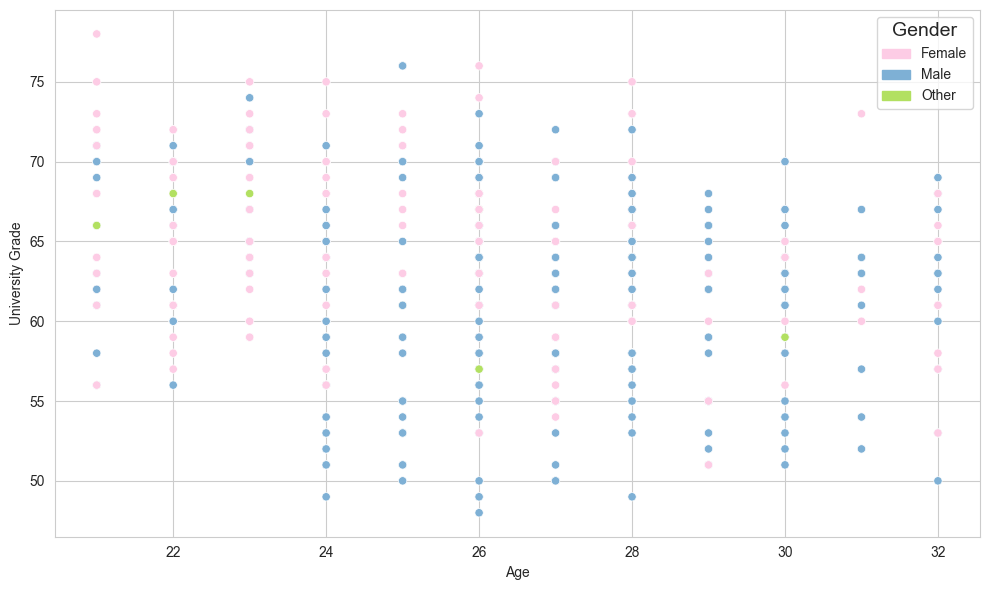

In [128]:
sns.set_style("whitegrid")
colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7", "#a57c1b"]
female_color = colors[7]
male_color = colors[1]

# Create color patches and labels for the legend
gender_colors = [female_color, male_color, '#b2e061']
gender_labels = ['Female', 'Male', 'Other']

# Get unique gender values in the DataFrame
unique_genders = D_data['gender'].unique()

# Create color patches for all unique genders
gender_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(gender_colors, gender_labels[:len(unique_genders)])]

plt.figure(figsize=(10, 6))

sns.scatterplot(data=D_data, x='age', y='ind-university_grade', hue='gender', marker='o', palette=gender_colors)

# Label the x-axis as "Age" and y-axis as "University Grade"
plt.xlabel("Age")
plt.ylabel("University Grade")

plt.tight_layout()

# Include the 'Other' gender patch in the legend if it's present in the data
if 'Other' in unique_genders:
    gender_patches.append(mpatches.Patch(color=gender_colors[len(unique_genders)], label='Other'))

# Create a legend with the "Gender" label above the different types
legend = plt.legend(handles=gender_patches, title="Gender")

# Set the title font size
legend.get_title().set_fontsize('14')

plt.show()

c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

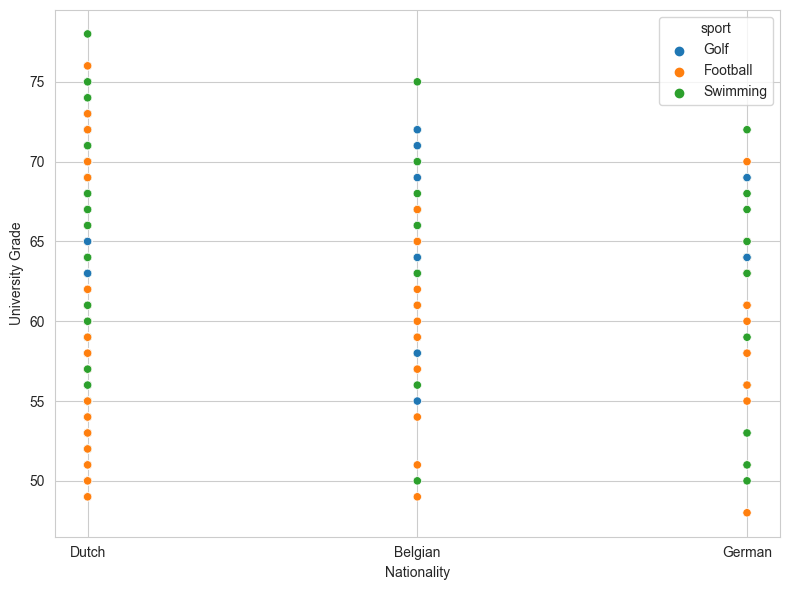

In [129]:
from matplotlib.ticker import MaxNLocator

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=D_data, y='ind-university_grade', x='nationality', hue='sport', marker='o', palette='tab10')
plt.xlabel('Nationality')
plt.ylabel('University Grade')

plt.tight_layout()
plt.show()


In [130]:
# Calculate min and max for 'ind-university_grade' and 'ind-languages' for each gender
min_max_values = D_data.groupby('gender').agg({
    'ind-university_grade': ['min', 'max'],
    'ind-languages': ['min', 'max']
})

# Flatten the multi-level index and reset the index
min_max_values.columns = [f'{col[0]}_{col[1].capitalize()}' for col in min_max_values.columns]
min_max_values.reset_index(inplace=True)

# Rename the columns for better readability
min_max_values.rename(columns={
    'ind-university_grade_Min': 'Min University Grade',
    'ind-university_grade_Max': 'Max University Grade',
    'ind-languages_Min': 'Min Number of Languages',
    'ind-languages_Max': 'Max Number of Languages'
}, inplace=True)

print(min_max_values)


   gender  Min University Grade  Max University Grade  \
0  female                    50                    78   
1    male                    48                    76   
2   other                    57                    68   

   Min Number of Languages  Max Number of Languages  
0                        0                        3  
1                        0                        3  
2                        0                        3  


c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


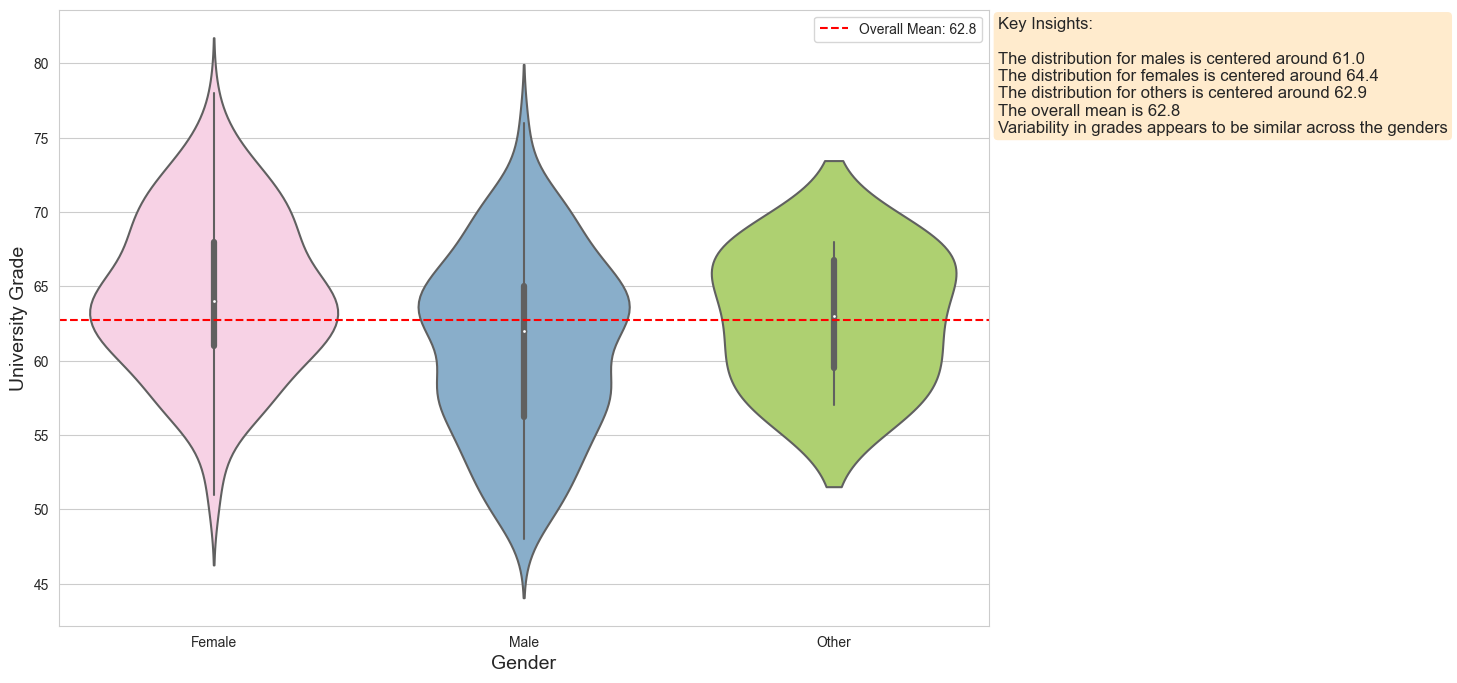

In [131]:
# Define colors consistently with the previous graph
colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7", "#a57c1b"]
female_color = colors[7]
male_color = colors[1]

# Create color patches and labels for the legend
gender_colors = [female_color, male_color, '#b2e061']
gender_labels = ['Female', 'Male', 'Other']

# Get unique gender values in the DataFrame
unique_genders = D_data['gender'].unique()

# Create color patches for all unique genders
gender_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(gender_colors, gender_labels[:len(unique_genders)])]

# Create a consistent color palette for the violin plot
palette = {
    'female': female_color,
    'male': male_color,
    'other': '#b2e061'
}

plt.figure(figsize=(12, 8))

# Use the consistent color palette in the violin plot
sns.violinplot(data=D_data, x='gender', y='ind-university_grade', palette=palette)

# Add titles and labels with larger fonts
plt.xlabel('Gender', fontsize=14)
plt.ylabel('University Grade', fontsize=14)

# Update x-axis labels to start with a capital letter
labels = [label.capitalize() for label in D_data['gender'].unique()]
plt.xticks(ticks=range(len(labels)), labels=labels)

# Calculate mean grades for each gender
mean_male = D_data[D_data['gender']=='male']['ind-university_grade'].mean()
mean_female = D_data[D_data['gender']=='female']['ind-university_grade'].mean()
mean_others = D_data[D_data['gender']=='other']['ind-university_grade'].mean()

# Calculate the mean of all means
mean_of_means = (mean_male + mean_female + mean_others) / 3

# Add a text box for annotations
annotation_text = f"Key Insights:\n\nThe distribution for males is centered around {mean_male:.1f}\n"
annotation_text += f"The distribution for females is centered around {mean_female:.1f}\n"
annotation_text += f"The distribution for others is centered around {mean_others:.1f}\n"
annotation_text += f"The overall mean is {mean_of_means:.1f}\n"
annotation_text += "Variability in grades appears to be similar across the genders"

plt.annotate(annotation_text, xy=(1.01, 0.8), xycoords='axes fraction', 
             fontsize=12, bbox=dict(boxstyle='round', fc='blanchedalmond'))

# Add a red dashed line at the mean of all means
plt.axhline(y=mean_of_means, color='r', linestyle='--', label=f'Overall Mean: {mean_of_means:.1f}')

# Show legend to explain the red line
plt.legend()

plt.show()

c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\matplotlib\table.py:808: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text=cellText[row][col],


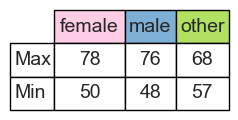

In [132]:
import matplotlib.pyplot as plt

# Sample data
grouped_D_data = D_data.groupby('gender')['ind-university_grade'].agg(['min', 'max'])

plt.figure(figsize=(2, 1))

# Max & Min Values
max_values = D_data.groupby('gender')['ind-university_grade'].max()
min_values = D_data.groupby('gender')['ind-university_grade'].min()

# Table
plt.axis('tight')
plt.axis('off')
palette = {
    'female': female_color,
    'male': male_color,
    'other': '#b2e061'
}
# Use the same colors as in the previous plots
the_table = plt.table(cellText=[max_values, min_values],
                      colLabels=max_values.index,
                      rowLabels=['Max', 'Min'],
                      cellLoc='center',
                      colColours=[palette[g] for g in max_values.index],  # Map gender labels to colors
                      loc='center')

# Customize table with fontsize, scaling, etc.
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(5.0, 2.0)  # Increase the size of the cells to fit text
the_table.auto_set_column_width(col=list(range(len(max_values.index))))  # Set automatic column width

plt.show()


c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


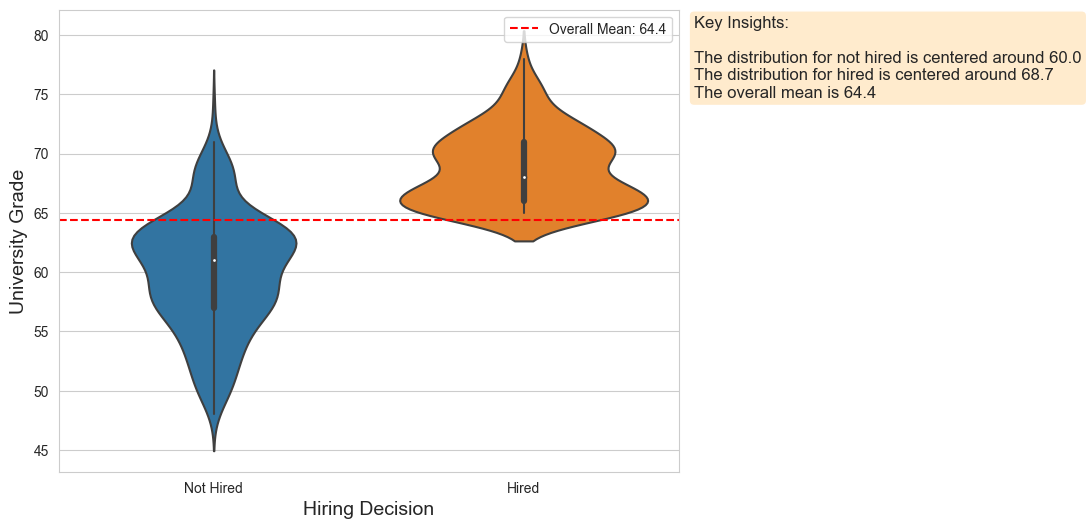

In [133]:
plt.figure(figsize=(8, 6))

# Choose a sophisticated color palette
sns.violinplot(data=D_data, x='decision', y='ind-university_grade')

# Add titles and labels with larger fonts
plt.xlabel('Hiring Decision', fontsize=14)
plt.ylabel('University Grade', fontsize=14)

# Calculate mean grades for each gender
mean_notH = D_data[D_data['decision']==False]['ind-university_grade'].mean()
mean_H = D_data[D_data['decision']==True]['ind-university_grade'].mean()

# Calculate the mean of all means
mean_of_means = (mean_notH + mean_H) / 2

# Add a text box for annotations
annotation_text = f"Key Insights:\n\nThe distribution for not hired is centered around {mean_notH:.1f}\n"
annotation_text += f"The distribution for hired is centered around {mean_H:.1f}\n"
annotation_text += f"The overall mean is {mean_of_means:.1f}"
plt.xticks(ticks=[False, True], labels=['Not Hired', 'Hired'])
plt.annotate(annotation_text, xy=(1.025, 0.81), xycoords='axes fraction', 
             fontsize=12, bbox=dict(boxstyle='round', fc='blanchedalmond'))

# Add a red dashed line at the mean of all means
plt.axhline(y=mean_of_means, color='r', linestyle='--', label=f'Overall Mean: {mean_of_means:.1f}')

# Show legend to explain the red line
plt.legend()


plt.show()

c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\matplotlib\table.py:808: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text=cellText[row][col],


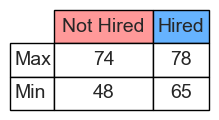

In [134]:
plt.figure(figsize=(1, 0.5))

# Max & Min Values (again, assuming D_data exists)
max_values = D_data.groupby('decision')['ind-university_grade'].max()
min_values = D_data.groupby('decision')['ind-university_grade'].min()

# Table
plt.axis('tight')
plt.axis('off')
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c4e17f']  # Change these to colors that suit your design

# Notice the change in colLabels
the_table = plt.table(cellText=[max_values, min_values],
                      colLabels=["Not Hired", "Hired"],  # Manually renamed columns
                      rowLabels=['Max', 'Min'],
                      cellLoc='center',
                      colColours=colors[:len(max_values.index)],
                      loc='center')

# Customize table with fontsize, scaling, etc.
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(5.0, 2.0)  # Increase the size of the cells to fit text
the_table.auto_set_column_width(col=list(range(len(max_values.index))))  # Set automatic column width

plt.show()

c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


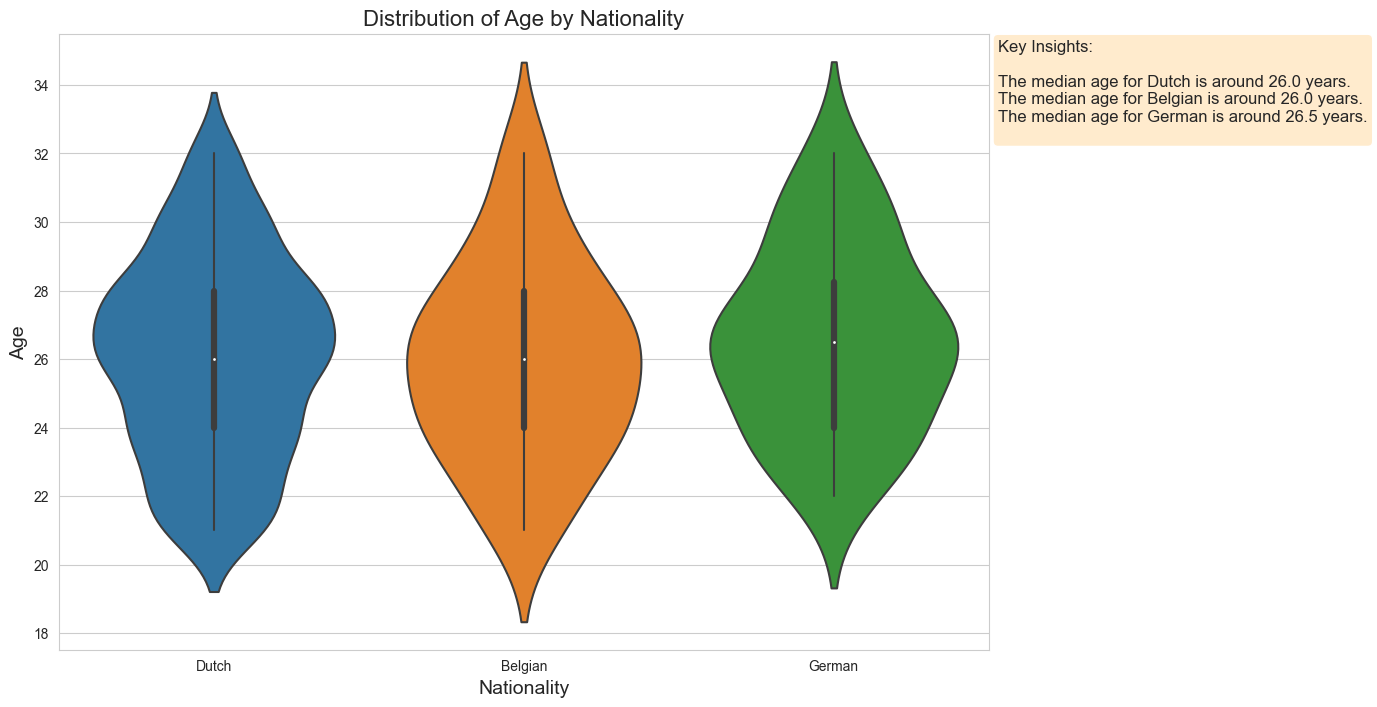

In [135]:
plt.figure(figsize=(12, 8))

# Choose a sophisticated color palette
sns.violinplot(data=D_data, y='age', x='nationality')

# Add titles and labels with larger fonts
plt.title('Distribution of Age by Nationality', fontsize=16)
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Age', fontsize=14)

# Generate key insights for annotations
annotation_text = "Key Insights:\n\n"
for nat in D_data['nationality'].unique():
    median_age = D_data[D_data['nationality'] == nat]['age'].median()
    annotation_text += f"The median age for {nat} is around {median_age} years.\n"

# Add a text box for annotations
plt.annotate(annotation_text, xy=(1.01, 0.83), xycoords='axes fraction',
             fontsize=12, bbox=dict(boxstyle='round', fc='blanchedalmond'))

plt.show()

c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\matplotlib\table.py:808: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will a

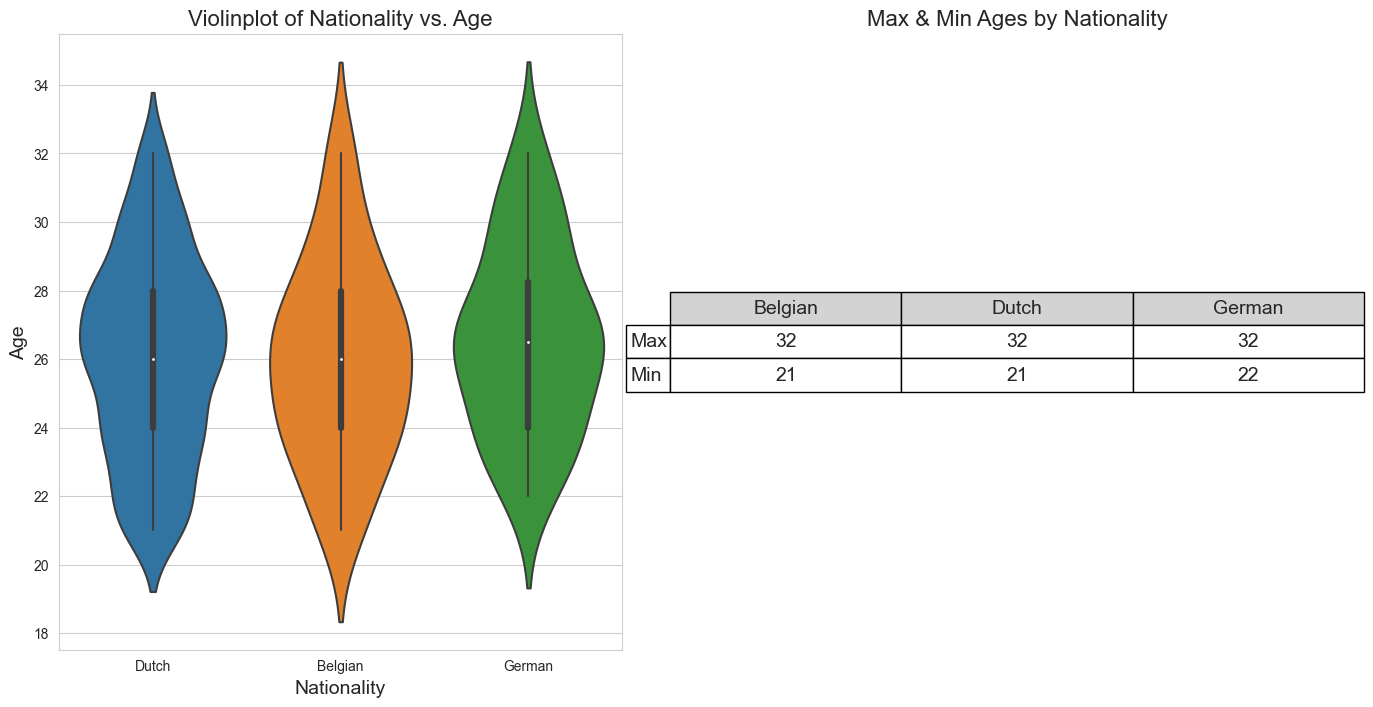

In [136]:
plt.figure(figsize=(16, 8))

# Violin Plot
plt.subplot(1, 2, 1)
sns.violinplot(data=D_data, x='nationality', y='age')
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Violinplot of Nationality vs. Age', fontsize=16)

# Max & Min Values
max_values = D_data.groupby('nationality')['age'].max()
min_values = D_data.groupby('nationality')['age'].min()

# Table
plt.subplot(1, 2, 2)
plt.axis('tight')
plt.axis('off')
the_table = plt.table(cellText=[max_values, min_values],
                      colLabels=max_values.index,
                      rowLabels=['Max', 'Min'],
                      cellLoc='center',
                      colColours=['#D3D3D3']*len(max_values.index),  # Grey color for columns
                      loc='center')

the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(1.23, 2)  # Increase the size of the cells to fit text
plt.title('Max & Min Ages by Nationality', fontsize=16)

plt.show()

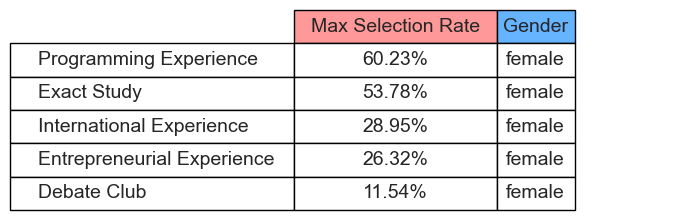

In [137]:
# Assuming D_data and gender_data are defined as in your code
gender_data = D_data[D_data['gender'].isin(['female', 'male'])]

indicators = [
    'ind-debateclub',
    'ind-programming_exp',
    'ind-international_exp',
    'ind-entrepeneur_exp',
    'ind-exact_study'
]

# Calculate selection rates for each indicator and gender
selection_rates_gender = pd.DataFrame()

for ind in indicators:
    rates = gender_data[gender_data[ind] == True].groupby('gender')['decision'].mean().reset_index()
    rates['indicator'] = ind
    selection_rates_gender = pd.concat([selection_rates_gender, rates], axis=0)

# Calculate the max selection rates for each indicator and sort them
max_rates_gender = selection_rates_gender.groupby('indicator')['decision'].max().reset_index()
max_rates_gender = max_rates_gender.sort_values(by='decision', ascending=False).reset_index(drop=True)

max_gender_for_rate = []
for ind in max_rates_gender['indicator']:
    max_rate = max_rates_gender[max_rates_gender['indicator'] == ind]['decision'].values[0]
    gender_for_max_rate = selection_rates_gender[
        (selection_rates_gender['indicator'] == ind) & 
        (selection_rates_gender['decision'] == max_rate)
    ]['gender'].values
    
    # Check if multiple genders have the same max rate
    if len(gender_for_max_rate) > 1:
        max_gender_for_rate.append("Both")
    else:
        max_gender_for_rate.append(gender_for_max_rate[0])

# Create the table storing max percentages and gender
max_rates_gender['gender_for_max_rate'] = max_gender_for_rate

# Rename the indicator names for better display
prettier_indicators = [
    'Debate Club',
    'Programming Experience',
    'International Experience',
    'Entrepreneurial Experience',
    'Exact Study'
]

# Map sorted indicators to sorted prettier indicators
sorted_prettier_indicators = [prettier_indicators[indicators.index(ind)] for ind in max_rates_gender['indicator']]

# Convert 'decision' column to percentages and format as strings
max_rates_gender['decision'] = (max_rates_gender['decision'] * 100).apply(lambda x: f"{x:.2f}%")

plt.figure(figsize=(6, 2))  # Adjust the size as you like

# Table configuration
plt.axis('tight')
plt.axis('off')
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c4e17f']  # Change these to colors that suit your design

# Create the table
the_table = plt.table(cellText=max_rates_gender[['decision', 'gender_for_max_rate']].values,
                      colLabels=['Max Selection Rate', 'Gender'],
                      rowLabels=sorted_prettier_indicators,
                      cellLoc='center',
                      colColours=colors[:2],
                      loc='center')

# Customize table with fontsize, scaling, etc.
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(2.5, 2.0)  # Increase the size of the cells to fit text
the_table.auto_set_column_width(col=list(range(2)))  # We have two columns so we set the range accordingly

plt.show()


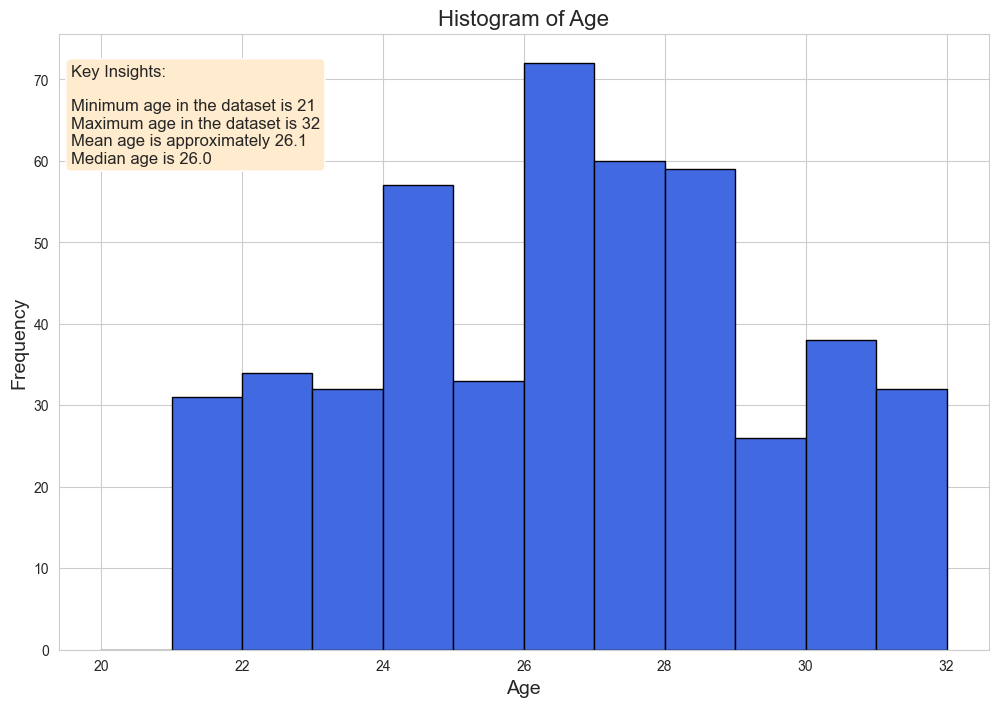

In [138]:
min_val = D_data['age'].min()
max_val = D_data['age'].max()

plt.figure(figsize=(12, 8))

plt.hist(D_data['age'], bins=12, color='#4169E1', edgecolor='black', range=(20, max_val))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Age', fontsize=16)

mean_age = D_data['age'].mean()
median_age = D_data['age'].median()

annotation_text = f"Key Insights:\n\n"
annotation_text += f"Minimum age in the dataset is {min_val}\n"
annotation_text += f"Maximum age in the dataset is {max_val}\n"
annotation_text += f"Mean age is approximately {mean_age:.1f}\n"
annotation_text += f"Median age is {median_age}"

plt.annotate(annotation_text, xy=(0.013, 0.79), xycoords='axes fraction',
             fontsize=12, bbox=dict(boxstyle='round', fc='blanchedalmond'))

plt.show()

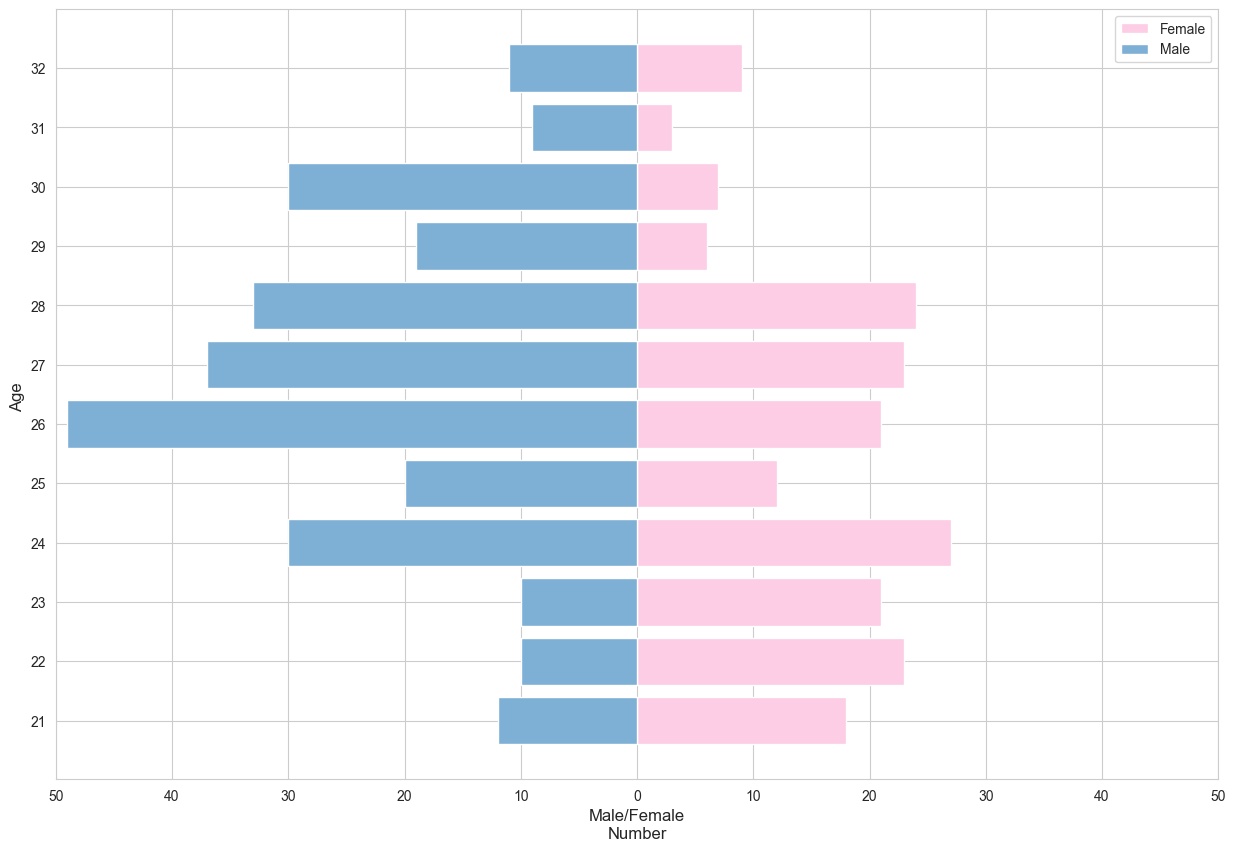

In [139]:
#AGE BY GENDER
age = [21, 22,23,24,25,26,27,28,29,30,31,32]
male = [0,0,0,0,0,0,0,0,0,0,0,0]
female = [0,0,0,0,0,0,0,0,0,0,0,0]

for i in age:
    for ind in D_data.index:
        if(i == D_data['age'][ind]):
            if (D_data['gender'][ind] == 'female'): female[i-21] +=1
            elif (D_data['gender'][ind] == 'male'): male[i-21] +=1


population_D_data = pd.DataFrame({"Age": age, "Male": male, "Female": female})
population_D_data["Female_Left"] = 0
population_D_data["Female_Width"] = population_D_data["Female"]
population_D_data["Male_Left"] = -population_D_data["Male"]
population_D_data["Male_Width"] = population_D_data["Male"]

fig = plt.figure(figsize=(15,10))

plt.barh(y=population_D_data["Age"], width=population_D_data["Female_Width"], color=female_color, label="Female");
plt.barh(y=population_D_data["Age"], width=population_D_data["Male_Width"], left=population_D_data["Male_Left"],
         color=male_color, label="Male")

ax1 = plt.subplot()
ax1.set_yticks(population_D_data["Age"])
plt.xticks(ticks=[-50, -40,-30,-20,-10, 0,10,20, 30,40 ,50],
labels=['50', '40', '30' ,'20','10', '0','10','20', '30','40', '50'])
plt.legend(loc="best");
plt.xlabel("Male/Female\nNumber", fontsize=12)
plt.ylabel("Age ",fontsize = 12)
plt.show()

C:\Users\lelou6\AppData\Local\Temp\ipykernel_10208\1368270398.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  selection_rates_natgen_age = filtered_data.groupby(['nationality_gender', 'age_group'])['decision'].mean().reset_index()
C:\Users\lelou6\AppData\Local\Temp\ipykernel_10208\1368270398.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=selection_rates_natgen_age, x='nationality_gender', y='decision', hue='age_group', ci=None)
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\

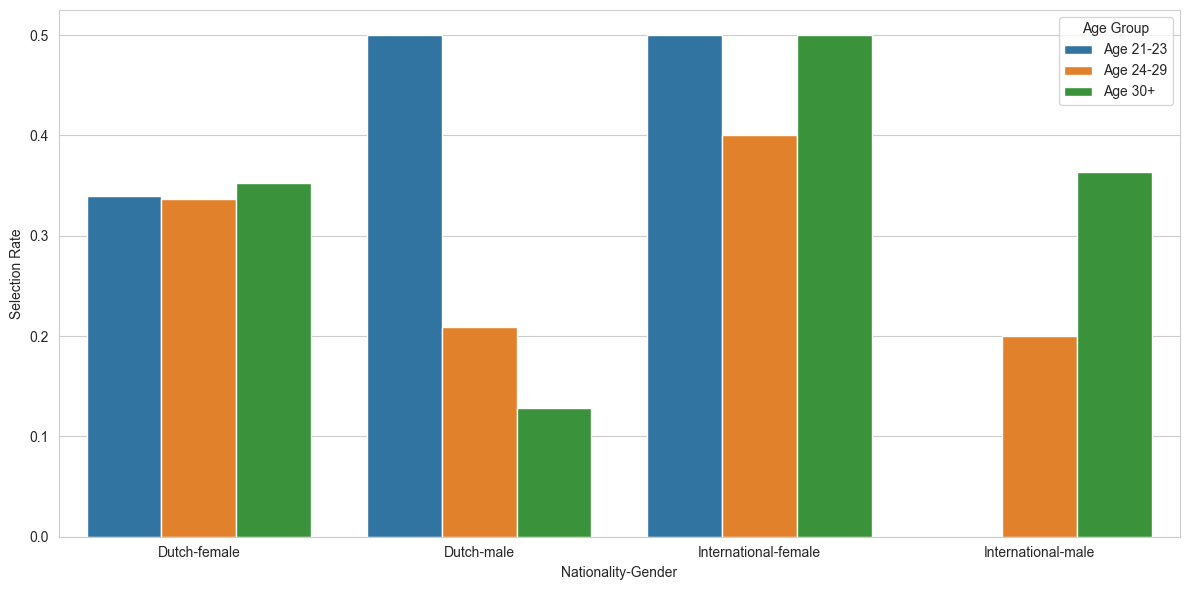

In [140]:
bins = [47, 64, 69, 100] 
labels = ['Grade 48-64', 'Grade 65-69', 'Grade 70+']
D_data['grade_group'] = pd.cut(D_data['ind-university_grade'], bins=bins, labels=labels, right=True)

bins = [20, 23, 29, 100]  
labels = ['Age 21-23', 'Age 24-29', 'Age 30+']
D_data['age_group'] = pd.cut(D_data['age'], bins=bins, labels=labels, right=True)

# Simplify nationality and filter data for specified genders
D_data['simple_nationality'] = D_data['nationality'].apply(lambda x: 'Dutch' if x == 'Dutch' else 'International')
filtered_data = D_data[D_data['gender'].isin(['female', 'male'])].copy()  # Creating a copy to avoid warnings

filtered_data['nationality_gender'] = filtered_data['simple_nationality'] + '-' + filtered_data['gender']

selection_rates_natgen_age = filtered_data.groupby(['nationality_gender', 'age_group'])['decision'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=selection_rates_natgen_age, x='nationality_gender', y='decision', hue='age_group', ci=None)
plt.xlabel('Nationality-Gender')
plt.ylabel('Selection Rate')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

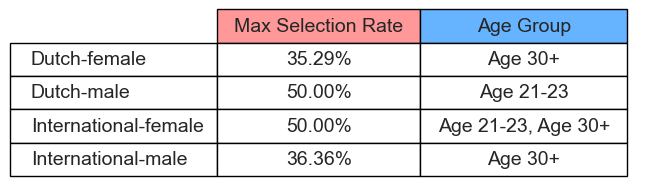

In [141]:
# Calculate max selection rates for each nationality-gender subgroup
max_rates_natgen = selection_rates_natgen_age.groupby('nationality_gender')['decision'].max().reset_index()

# Find all age groups corresponding to each max rate (in case of ties)
max_age_for_rate = []
for natgen in max_rates_natgen['nationality_gender'].unique():
    max_rate = max_rates_natgen[max_rates_natgen['nationality_gender'] == natgen]['decision'].values[0]
    age_groups_for_max_rate = selection_rates_natgen_age[
        (selection_rates_natgen_age['nationality_gender'] == natgen) & 
        (selection_rates_natgen_age['decision'] == max_rate)
    ]['age_group'].values
    
    # Check if multiple age groups have the same max rate
    if len(age_groups_for_max_rate) > 1:
        max_age_for_rate.append(", ".join(age_groups_for_max_rate))
    else:
        max_age_for_rate.append(age_groups_for_max_rate[0])

# Create the table storing max percentages and age groups
max_rates_natgen['age_for_max_rate'] = max_age_for_rate
# Convert 'decision' column to percentages and format as strings
max_rates_natgen['decision'] = (max_rates_natgen['decision'] * 100).apply(lambda x: f"{x:.2f}%")

# Plot the table
plt.figure(figsize=(6, 2))  # Adjust the size as you like

# Table configuration
plt.axis('tight')
plt.axis('off')
colors = ['#ff9999', '#66b3ff']  # Use colors of your choice

# Create the table
the_table = plt.table(cellText=max_rates_natgen[['decision', 'age_for_max_rate']].values,
                      colLabels=['Max Selection Rate', 'Age Group'],  # Column names
                      rowLabels=max_rates_natgen['nationality_gender'],  # Nationality-Gender subgroups as row names
                      cellLoc='center',
                      colColours=colors,  # We have only two columns so no need to slice
                      loc='center')

# Customize table with fontsize, scaling, etc.
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(2.5, 2.0)  # Increase the size of the cells to fit text
the_table.auto_set_column_width(col=list(range(2)))  # We have two columns so we set the range accordingly

plt.show()


In [142]:
# Calculate probability of getting hired by age and degree
age_degree_prob = D_data.groupby(['age', 'ind-degree'])['decision'].mean().reset_index()

# Nationality and Age vs. Hiring Decision
nat_age_prob = D_data.groupby(['nationality', 'age'])['decision'].mean().reset_index()

# University Grade and Gender vs. Hiring Decision
grade_gender_prob = D_data.groupby(['ind-university_grade', 'gender'])['decision'].mean().reset_index()

# Programming Experience and Age vs. Hiring Decision
prog_age_prob = D_data.groupby(['ind-programming_exp', 'age'])['decision'].mean().reset_index()

# International Experience vs. Hiring Decision
intl_exp_prob = D_data.groupby('ind-international_exp')['decision'].mean().reset_index()

# Degree Type and Gender vs. Hiring Decision
degree_gender_prob = D_data.groupby(['ind-degree', 'gender'])['decision'].mean().reset_index()

# Language Skills and University Grade vs. Hiring Decision
lang_grade_prob = D_data.groupby(['ind-languages', 'ind-university_grade'])['decision'].mean().reset_index()

# Sport and Gender vs. Hiring Decision
sport_gender_prob = D_data.groupby(['sport', 'gender'])['decision'].mean().reset_index()



C:\Users\lelou6\AppData\Local\Temp\ipykernel_10208\1721106910.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_degree_prob = D_data.groupby(['age_bin', 'ind-degree'])['decision'].mean().reset_index()
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals

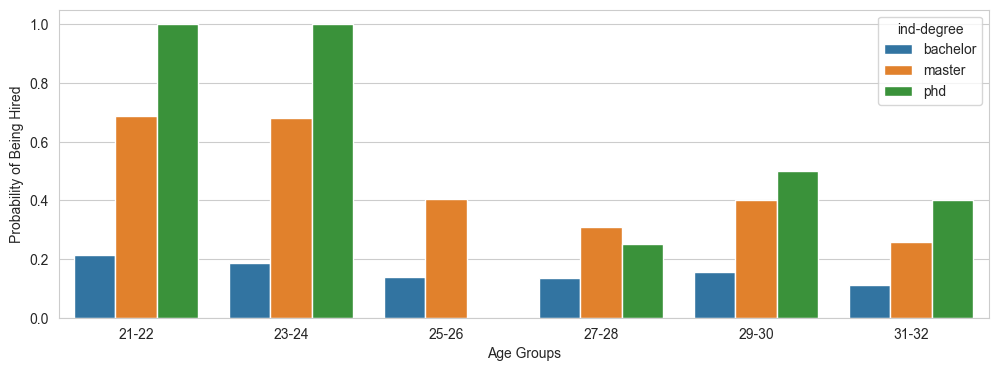

In [143]:
bins = [20, 22, 24, 26, 28, 30, 32]
labels = ['21-22', '23-24', '25-26', '27-28', '29-30', '31-32']

# Create a new column for age bins
D_data['age_bin'] = pd.cut(D_data['age'], bins=bins, labels=labels, right=False)

# Calculate probability of getting hired by age bin and degree
age_degree_prob = D_data.groupby(['age_bin', 'ind-degree'])['decision'].mean().reset_index()

def plot_prob(D_data, x, hue, y='decision', title=''):
    plt.figure(figsize=(12, 4))
    sns.barplot(data=D_data, x=x, hue=hue, y=y)
    plt.title(title)
    plt.ylabel('Probability of Being Hired')
    plt.xlabel('Age Groups')
    plt.show()

# Plot the probabilities
plot_prob(age_degree_prob, 'age_bin', 'ind-degree')

C:\Users\lelou6\AppData\Local\Temp\ipykernel_10208\2706283999.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_prob_per_age_bin = age_degree_prob.groupby('age_bin')['decision'].idxmax()


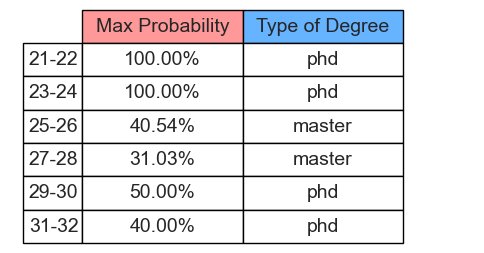

In [144]:
# Convert the 'decision' column probabilities to percentages and format as strings
max_prob_per_age_bin = age_degree_prob.groupby('age_bin')['decision'].idxmax()
max_prob_data = age_degree_prob.loc[max_prob_per_age_bin].reset_index(drop=True)
max_prob_data['decision'] = (max_prob_data['decision'] * 100).apply(lambda x: f"{x:.2f}%")

plt.figure(figsize=(6, 2))  # Adjust the size as you like

# Table
plt.axis('tight')
plt.axis('off')
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c4e17f']  # Change these to colors that suit your design

# Create the table
the_table = plt.table(cellText=max_prob_data[['decision', 'ind-degree']].values,
                      colLabels=['Max Probability', 'Type of Degree'],  # Column names
                      rowLabels=max_prob_data['age_bin'],  # Age bins as row names
                      cellLoc='center',
                      colColours=colors[:2],  # We have only two columns so we slice the colors list
                      loc='center')

# Customize table with fontsize, scaling, etc.
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(2.5, 2.0)  # Increase the size of the cells to fit text
the_table.auto_set_column_width(col=list(range(2)))  # We have two columns so we set the range accordingly

plt.show()


c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lelou6\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

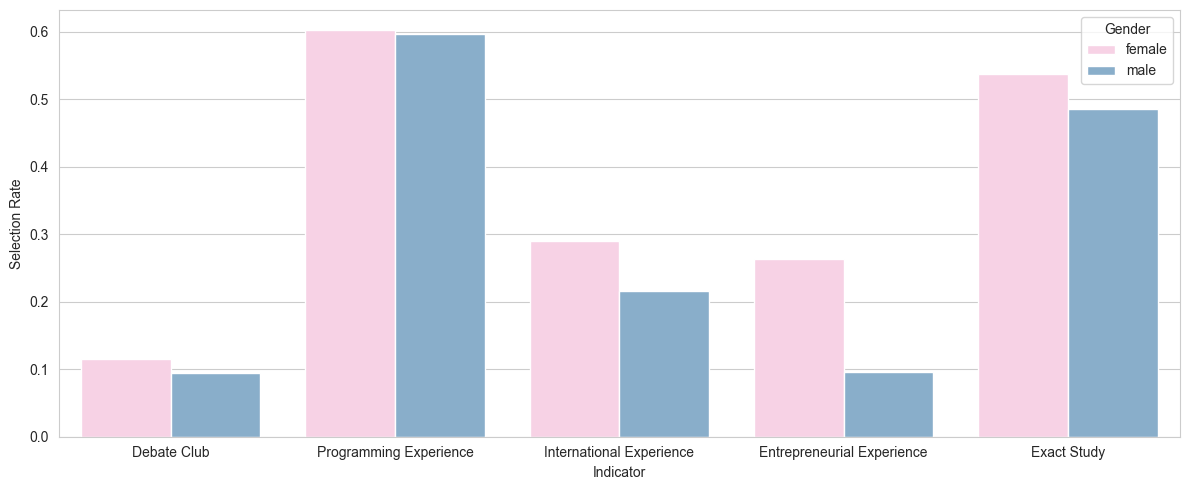

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming D_data and gender_data are defined as in your code
gender_data = D_data[D_data['gender'].isin(['female', 'male'])]

indicators = [
    'ind-debateclub',
    'ind-programming_exp',
    'ind-international_exp',
    'ind-entrepeneur_exp',
    'ind-exact_study'
]

# Calculate selection rates for each indicator and gender
selection_rates_gender = pd.DataFrame()

for ind in indicators:
    rates = gender_data[gender_data[ind] == True].groupby('gender')['decision'].mean().reset_index()
    rates['indicator'] = ind
    selection_rates_gender = pd.concat([selection_rates_gender, rates], axis=0)

# Define a consistent color palette for the genders
palette = {
    'female': female_color,
    'male': male_color,
    'other': '#b2e061'
}

# Generate the plot with the specified palette
plt.figure(figsize=(12, 5))
sns.barplot(data=selection_rates_gender, x='indicator', y='decision', hue='gender', palette=palette)

# Rename x-axis labels
new_labels = ['Debate Club', 'Programming Experience', 'International Experience', 'Entrepreneurial Experience', 'Exact Study']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

plt.xlabel('Indicator')
plt.ylabel('Selection Rate')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


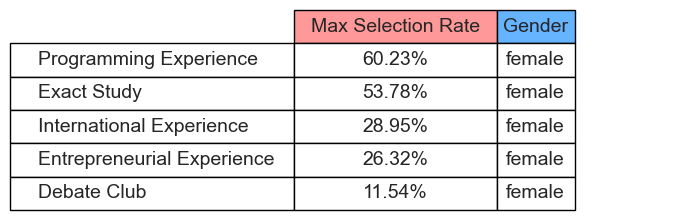

In [146]:
# Assuming D_data and gender_data are defined as in your code
gender_data = D_data[D_data['gender'].isin(['female', 'male'])]

indicators = [
    'ind-debateclub',
    'ind-programming_exp',
    'ind-international_exp',
    'ind-entrepeneur_exp',
    'ind-exact_study'
]

# Calculate selection rates for each indicator and gender
selection_rates_gender = pd.DataFrame()

for ind in indicators:
    rates = gender_data[gender_data[ind] == True].groupby('gender')['decision'].mean().reset_index()
    rates['indicator'] = ind
    selection_rates_gender = pd.concat([selection_rates_gender, rates], axis=0)

# Calculate the max selection rates for each indicator and sort them
max_rates_gender = selection_rates_gender.groupby('indicator')['decision'].max().reset_index()
max_rates_gender = max_rates_gender.sort_values(by='decision', ascending=False).reset_index(drop=True)

max_gender_for_rate = []
for ind in max_rates_gender['indicator']:
    max_rate = max_rates_gender[max_rates_gender['indicator'] == ind]['decision'].values[0]
    gender_for_max_rate = selection_rates_gender[
        (selection_rates_gender['indicator'] == ind) & 
        (selection_rates_gender['decision'] == max_rate)
    ]['gender'].values
    
    # Check if multiple genders have the same max rate
    if len(gender_for_max_rate) > 1:
        max_gender_for_rate.append("Both")
    else:
        max_gender_for_rate.append(gender_for_max_rate[0])

# Create the table storing max percentages and gender
max_rates_gender['gender_for_max_rate'] = max_gender_for_rate

# Rename the indicator names for better display
prettier_indicators = [
    'Debate Club',
    'Programming Experience',
    'International Experience',
    'Entrepreneurial Experience',
    'Exact Study'
]

# Map sorted indicators to sorted prettier indicators
sorted_prettier_indicators = [prettier_indicators[indicators.index(ind)] for ind in max_rates_gender['indicator']]

# Convert 'decision' column to percentages and format as strings
max_rates_gender['decision'] = (max_rates_gender['decision'] * 100).apply(lambda x: f"{x:.2f}%")

plt.figure(figsize=(6, 2))  # Adjust the size as you like

# Table configuration
plt.axis('tight')
plt.axis('off')
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c4e17f']  # Change these to colors that suit your design

# Create the table
the_table = plt.table(cellText=max_rates_gender[['decision', 'gender_for_max_rate']].values,
                      colLabels=['Max Selection Rate', 'Gender'],
                      rowLabels=sorted_prettier_indicators,
                      cellLoc='center',
                      colColours=colors[:2],
                      loc='center')

# Customize table with fontsize, scaling, etc.
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(2.5, 2.0)  # Increase the size of the cells to fit text
the_table.auto_set_column_width(col=list(range(2)))  # We have two columns so we set the range accordingly

plt.show()

C:\Users\lelou6\AppData\Local\Temp\ipykernel_10208\369632466.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = D_data[D_data[ind] == True].groupby('uni_grade_grouped')['uni_grade_grouped'].count().reset_index(name='rate')
C:\Users\lelou6\AppData\Local\Temp\ipykernel_10208\369632466.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = D_data.groupby('uni_grade_grouped')['uni_grade_grouped'].count().reset_index(name='rate')
C:\Users\lelou6\AppData\Local\Temp\ipykernel_10208\369632466.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future vers

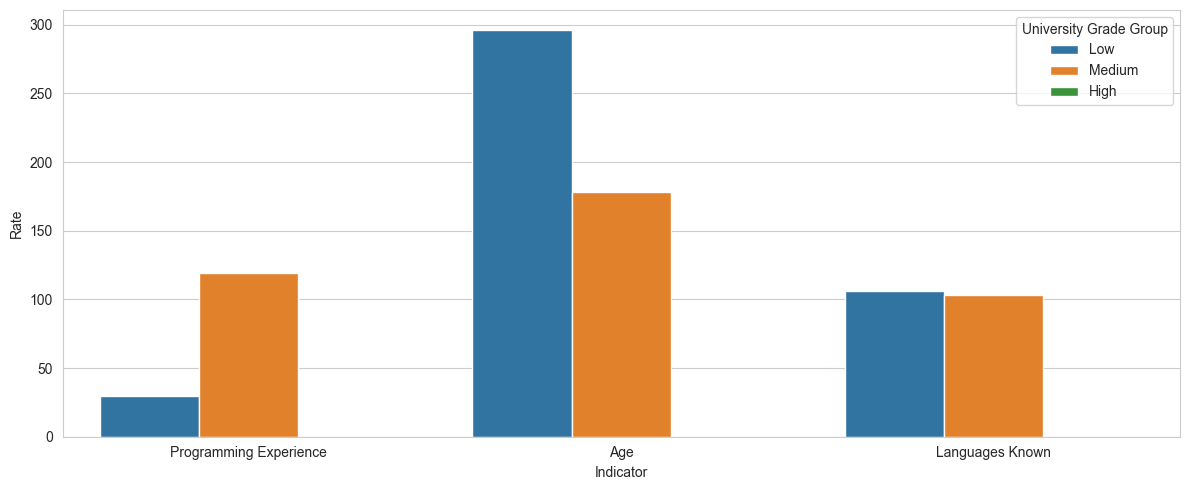

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming D_data is defined and contains the columns we are interested in

# Group university grades into relevant categories
bins = [0, 65, 80, 90]  # Define your own bins here
labels = ['Low', 'Medium', 'High']
D_data['uni_grade_grouped'] = pd.cut(D_data['ind-university_grade'], bins=bins, labels=labels, right=False)

indicators = [
    'ind-programming_exp',
    'age',
    'ind-languages'
]

# Calculate rates for each indicator and grouped university grade
selection_rates_uni_grade = pd.DataFrame()

for ind in indicators:
    if ind != 'age':  # age is not a Boolean column
        rates = D_data[D_data[ind] == True].groupby('uni_grade_grouped')['uni_grade_grouped'].count().reset_index(name='rate')
    else:
        # For age, you could group it in bins or calculate the rate directly
        rates = D_data.groupby('uni_grade_grouped')['uni_grade_grouped'].count().reset_index(name='rate')
        
    rates['indicator'] = ind
    selection_rates_uni_grade = pd.concat([selection_rates_uni_grade, rates], axis=0)

# Generate the plot
plt.figure(figsize=(12, 5))
sns.barplot(data=selection_rates_uni_grade, x='indicator', y='rate', hue='uni_grade_grouped')

# Rename x-axis labels
new_labels = ['Programming Experience', 'Age', 'Languages Known']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

plt.xlabel('Indicator')
plt.ylabel('Rate')
plt.legend(title='University Grade Group')
plt.tight_layout()
plt.show()


C:\Users\lelou6\AppData\Local\Temp\ipykernel_10208\528312895.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = D_data[D_data[ind] == True].groupby('uni_grade_grouped')['decision'].mean().reset_index()
C:\Users\lelou6\AppData\Local\Temp\ipykernel_10208\528312895.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = D_data[D_data[ind] == True].groupby('uni_grade_grouped')['decision'].mean().reset_index()
C:\Users\lelou6\AppData\Local\Temp\ipykernel_10208\528312895.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass o

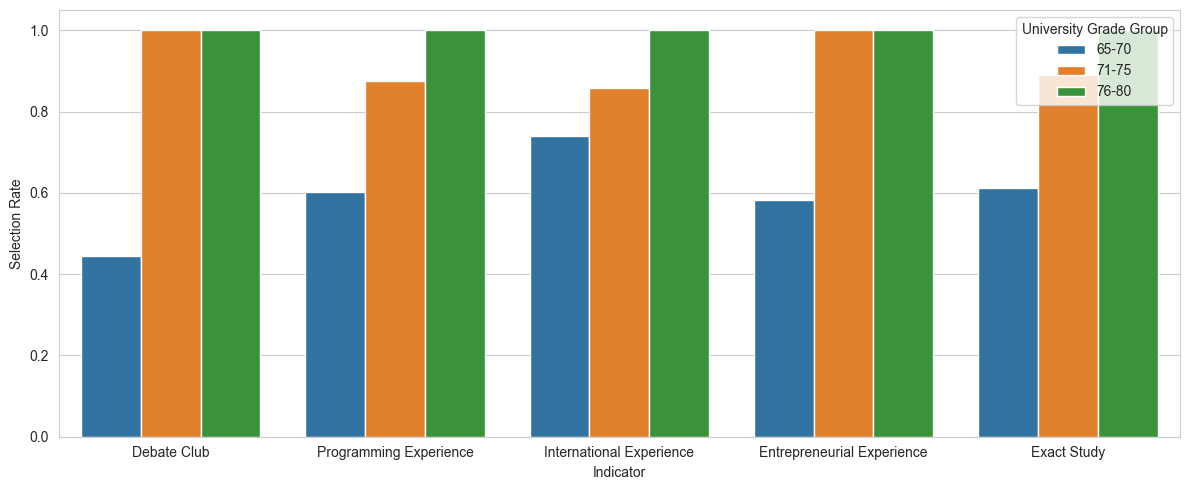

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming D_data is defined and contains the columns we're interested in
# For demonstration, uncomment below to simulate a DataFrame
# D_data = pd.DataFrame({
#     'ind-university_grade': [60, 70, 85, 95, 65, 78, 92],
#     'ind-debateclub': [True, False, True, True, False, True, False],
#     'ind-programming_exp': [True, True, False, True, False, True, True],
#     'ind-international_exp': [False, False, True, True, False, True, False],
#     'ind-entrepeneur_exp': [True, False, True, False, False, True, True],
#     'ind-exact_study': [False, True, True, True, True, False, True],
#     'decision': [True, False, True, True, False, True, False]
# })

# Group university grades into relevant categories
bins = [65, 70, 75, 80]  # Define your bins here
labels = ['65-70', '71-75','76-80']
D_data['uni_grade_grouped'] = pd.cut(D_data['ind-university_grade'], bins=bins, labels=labels, right=False)

# List of indicators
indicators = [
    'ind-debateclub',
    'ind-programming_exp',
    'ind-international_exp',
    'ind-entrepeneur_exp',
    'ind-exact_study'
]

# Create an empty DataFrame to store selection rates by university grade group
selection_rates_uni_grade_grouped = pd.DataFrame()

# Calculate selection rates for each indicator and university grade group
for ind in indicators:
    rates = D_data[D_data[ind] == True].groupby('uni_grade_grouped')['decision'].mean().reset_index()
    rates['indicator'] = ind
    selection_rates_uni_grade_grouped = pd.concat([selection_rates_uni_grade_grouped, rates], axis=0)

# Generate the plot
plt.figure(figsize=(12, 5))
sns.barplot(data=selection_rates_uni_grade_grouped, x='indicator', y='decision', hue='uni_grade_grouped')

# Rename x-axis labels
new_labels = ['Debate Club', 'Programming Experience', 'International Experience', 'Entrepreneurial Experience', 'Exact Study']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

plt.xlabel('Indicator')
plt.ylabel('Selection Rate')
plt.legend(title='University Grade Group')
plt.tight_layout()
plt.show()
